In [42]:
# compare the PCC of various transition matrixes plotted against the fitness functions tm, kcat, km, kcatkm 

In [43]:
import pandas 

In [52]:
from glob import glob 

transition_matrices = {}
for x in glob( '../data_sets/sub_matrix/*' ):
    d = pandas.read_csv( x, comment='#', index_col=0, sep=r'\s+' ) 
    d = dict( d.stack().iteritems() ) 
    transition_matrices.update( { x.split( '/' )[ -1 ]: d } ) 

In [53]:
ff = [ 'tm', 'kcat', 'km', 'kcatkm' ] 

df = pandas.read_csv( 'updated_data_set.csv', index_col=0 ) 
df = df.drop( [ 'BglB' ] ) 
df = df[ ff ] 

# set up transitions
df[ 'transition' ] = list( zip( df.index.str[0], df.index.str[-1] ) )

for transition_matrix in transition_matrices.keys():
    my_matrix = transition_matrices[ transition_matrix ] 
    df[ transition_matrix ] = df[ 'transition' ].map( my_matrix ) 
    
df.corr()[ ff ].drop( ff, axis=0 ) 

,tm,kcat,km,kcatkm
PAM100,0.088046,0.037278,-0.177880,0.097195
PAM210,0.072772,0.058155,-0.194083,0.083157
BLOSUM35,0.076412,0.063426,-0.227916,0.050994
PAM480,0.009291,0.079221,-0.246251,0.059952
PAM140,0.081042,0.052454,-0.183784,0.078980
PAM470,0.034686,0.080970,-0.237886,0.062669
BLOSUM45,0.029041,0.014762,-0.189927,0.048983
PAM440,0.008008,0.086464,-0.238995,0.063264
PAM290,0.034803,0.053456,-0.196056,0.050295
BLOSUM55,0.058724,0.051890,-0.101461,0.083992


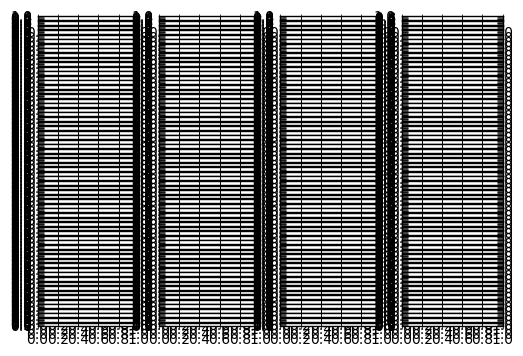

In [51]:
fig, ax = plt.subplots( nrows=len( df.columns )-4, ncols=4 ) 
